In [1]:
import json
import requests
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data_source = 'https://livescore.123go.vn/livescoregeneralv2/result?eventId=610&stageId=30&typePage=60&flagLeader=0&refresh_cache=0'
resp = requests.get(url=data_source)
json_data = resp.json() 

In [ ]:
# if cache data
json_path = 'somewhere/on/your/disk'
with open(json_path) as json_file:  
    json_data = json.load(json_file)

In [3]:
total_record = json_data['page_info']['total_record']

In [4]:
import datetime
participants = []
exceptions = {
    '21891': 'Female'
}
for i in json_data['data']:
    t = datetime.datetime.strptime(i['chip_time'], '%H:%M:%S')
    if t.hour > 0:
        try:
            sex = i['age_groups']['68']['age_group_name']
        except Exception as e:
            sex = exceptions.get(i['bib_number'], 'NA')
        participants.append((i['bib_number'], i['chip_time'], i['rank'], i['age_groups'], sex))

In [5]:
df = pd.DataFrame(participants, columns=['bib', 'chip_time', 'rank', 'age_group', 'sex'])
# df['time'] = pd.to_datetime(df['time'].str.strip(), format='%H:%M:%S')
def comp_minutes(t_str):
    t = t_str.split(':')
    return int(t[0])*60 + int(t[1])
df['time'] = df['chip_time'].map(comp_minutes)

In [6]:
na = df[df['sex'] == 'NA']

In [7]:
na

,bib,chip_time,rank,age_group,sex,time
1569,29020,08:09:22,1570,[],NA,489
1667,29061,08:43:47,1668,[],NA,523
1743,29101,09:36:13,1744,[],NA,576


In [8]:
male = df[df['sex'] == 'Male']
female = df[df['sex'] != 'Male']

In [9]:
male.head(10)

,bib,chip_time,rank,age_group,sex,time
0,21577,02:22:26,1,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,142
1,21532,02:24:07,2,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,144
2,21618,02:28:59,3,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,148
3,20930,02:29:38,4,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,149
4,20193,02:32:30,5,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,152
5,21512,02:33:04,6,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,153
6,20796,02:45:56,7,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,165
7,20828,02:45:56,8,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,165
8,21352,02:46:23,9,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,166
9,21535,02:47:19,10,"{'68': {'age_group_name': 'Male', 'age_group_r...",Male,167


In [10]:
female.head(10)

,bib,chip_time,rank,age_group,sex,time
10,20146,02:47:39,11,"{'68': {'age_group_name': 'Female', 'age_group...",Female,167
14,20497,02:56:39,15,"{'68': {'age_group_name': 'Female', 'age_group...",Female,176
19,21514,03:06:15,20,"{'68': {'age_group_name': 'Female', 'age_group...",Female,186
20,20452,03:08:50,21,"{'68': {'age_group_name': 'Female', 'age_group...",Female,188
26,20829,03:18:27,27,"{'68': {'age_group_name': 'Female', 'age_group...",Female,198
33,21522,03:24:06,34,"{'68': {'age_group_name': 'Female', 'age_group...",Female,204
34,21515,03:24:20,35,"{'68': {'age_group_name': 'Female', 'age_group...",Female,204
36,21206,03:25:36,37,"{'68': {'age_group_name': 'Female', 'age_group...",Female,205
39,20417,03:27:20,40,"{'68': {'age_group_name': 'Female', 'age_group...",Female,207
40,20483,03:27:25,41,"{'68': {'age_group_name': 'Female', 'age_group...",Female,207


In [11]:
import numpy as np
bins = np.linspace(min(df.time), max(df.time), 15)

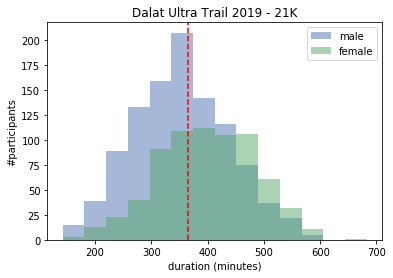

In [12]:
plt.style.use('seaborn-deep')
plt.hist(male.time, bins, alpha=0.5, label='male')
plt.hist(female.time, bins, alpha=0.5, label='female')
plt.legend(loc='upper right')
plt.xlabel('duration (minutes)')
plt.ylabel('#participants')
plt.title('Dalat Ultra Trail 2019 - 21K')
plt.axvline(x=365, color='r', ls='--')
plt.savefig('DUT2019.png',dpi=350)
plt.show()